In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def load_simulation_data(M, T, rho, simJob):
    return np.load("../results-longrun-nohist/argon-M-%d-T-%.2f-rho-%.2f-simjob-%d.npz" % (M,T,rho,simJob))

Ms = [6]
Ts = np.linspace(0.25, 4.0, 16)
rhos = np.concatenate((np.array([0.02, 0.05]), np.linspace(0.1, 2.0, 20)))
simJobs = [0]

def process_diffustion_data(dataIn):
    key = "diffusion_distance"
    
    diffDist = np.zeros((3, 5000))
    diffDist[0,:] = dataIn[key][0:5000]
    diffDist[1,:] = dataIn[key][5000:10000]
    diffDist[2,:] = dataIn[key][10000:15000]
    
    return diffDist.T

In [14]:
diffData1 = load_simulation_data(6, 1.0, 0.02, 0)
diffData2 = load_simulation_data(6, 0.5, 1.2, 0)

1.5859107958015837
[  35.95274937 -180.82191109]
2.831378645316229
36.0680000098
0.231572741392


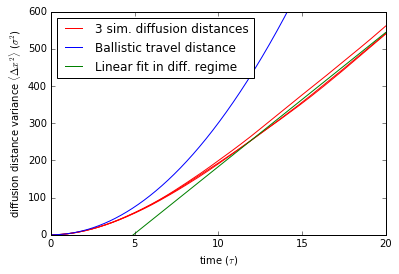

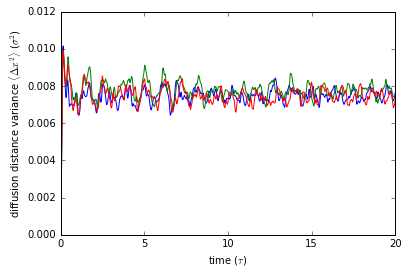

In [27]:

diffDist1 = process_diffustion_data(diffData1)
print(diffData1["cv"])
timeRange = np.arange(0,5000)*diffData1["h"]
vsq = diffData1["diffusion_ballistic_velocitysq"]
a = plt.plot(timeRange, diffDist1, color="red")
a[0].set_label("3 sim. diffusion distances")
ylims = plt.ylim()
plt.plot(timeRange, timeRange**2 * vsq, label=r"Ballistic travel distance")

D_fits = np.zeros((3,2))
D_covs = np.zeros((3,2,2))

for l in range(0,3):
    D_fits[l,:], D_covs[l,:,:] = np.polyfit(timeRange[3000:], diffDist1[3000:,l], 1, cov=True)
    
diffLin = timeRange * np.mean(D_fits[:,0]) + np.mean(D_fits[:,1])
plt.plot(timeRange, diffLin, label="Linear fit in diff. regime")
plt.ylim(ylims)
plt.legend(loc=2)
plt.xlabel(r"time ($\tau$)")
plt.ylabel(r"diffusion distance variance $\langle \Delta x^2 \rangle$ ($\sigma^2$)")
plt.savefig("longrun/diffusion-gas.png", dpi=300)
print(D_fit)


diffDist2 = process_diffustion_data(diffData2)
print(diffData2["cv"])
plt.figure()
plt.plot(timeRange, diffDist2)
plt.xlabel(r"time ($\tau$)")
plt.ylabel(r"diffusion distance variance $\langle \Delta x^2 \rangle$ ($\sigma^2$)")
plt.savefig("longrun/diffusion-solid.png", dpi=300)

print(np.mean(D_fits[:,0]))
print(np.std(D_fits[:,0])/np.sqrt(3))

In [19]:
diffDist1[3000:,l]

array([ 255.54732425,  255.67767244,  255.80807824, ...,  539.60393996,
        539.75976507,  539.9156216 ])

In [37]:
est_D_means = np.zeros((len(Ts), len(rhos), len(simJobs)))
est_D_stds = np.zeros((len(Ts), len(rhos), len(simJobs)))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        for k in range(0, len(simJobs)):
            with load_simulation_data(6, Ts[i], rhos[j], simJobs[k]) as data:
                diffDist = process_diffustion_data(data)
                
                Ds = np.zeros(3)
                
                for l in range(0,3):
                    Ds[l], _ = np.polyfit(timeRange[3000:], diffDist[3000:,l], 1)
                    
                est_D_means[i,j,k] = np.mean(Ds)
                est_D_stds[i,j,k] = np.std(Ds) / np.sqrt(3)

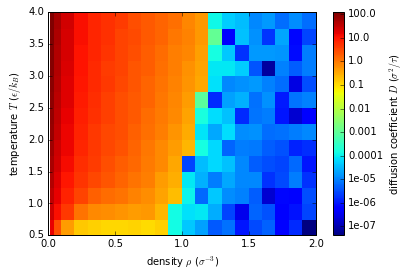

In [46]:
plt.pcolor(rhos, Ts[1:], np.log10(np.abs(est_D_means[1:,:,0])))
cbar = plt.colorbar(label=r"diffusion coefficient $D$ ($\sigma ^{2} / \tau$)")
cbar.set_ticks([-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4])
cbar.set_ticklabels(np.power(10, [-7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0, 1, 2, 3, 4]))
plt.xlabel(r"density $\rho$ ($\sigma ^{-3}$)")
plt.ylabel(r"temperature $T$ ($\epsilon / k_B$)")
plt.savefig("longrun/diffusion-colorplot.png", dpi=300)

0.7
0.8
0.9
1.0
1.1
1.2


/Users/jesse/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


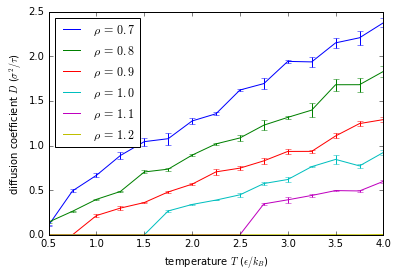

In [63]:
r = 8
for r in range(8,14):
    print(rhos[r])
    plt.plot(Ts[1:], np.abs(est_D_means[1:,r]), label=r"$\rho\, =\, " + str(rhos[r]) + "$")
    
plt.gca().set_color_cycle(None)
for r in range(8,14):
    plt.errorbar(Ts[1:], np.abs(est_D_means[1:,r]), yerr=est_D_stds[1:,r], linestyle="None")
plt.legend(loc=2)
plt.xlabel(r"temperature $T$ ($\epsilon / k_B$)")
plt.ylabel(r"diffusion coefficient $D$ ($\sigma^{2} / \tau$)")
plt.ylim(0,2.5)
plt.savefig("longrun/diffusion-coefficients-rhos.png", dpi=300)


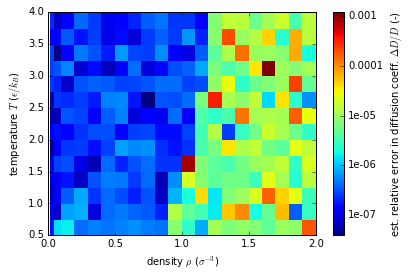

In [61]:
plt.pcolor(rhos, Ts[1:], np.log10(np.abs(est_D_stds[1:,:,0]/est_D_means[1:,:,0])))
cbar = plt.colorbar(label=r"est. relative error in diffusion coeff. $\Delta D / D$ (-)")
cbar.set_ticks([-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4])
cbar.set_ticklabels(np.power(10, [-7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0, 1, 2, 3, 4]))
plt.xlabel(r"density $\rho$ ($\sigma ^{-3}$)")
plt.ylabel(r"temperature $T$ ($\epsilon / k_B$)")
plt.savefig("longrun/diffusion-colorplot-stds.png", dpi=300)